# 13wk-2: 클래스 (3)

최규빈  
2024-05-31

# 1. 강의영상

In [1]:
#{{<video https://youtu.be/playlist?list=PLQqh36zP38-wMY2MS-ZGKFXqVgbTeAzNQ&si=iojT6Aif9fwoOyUN >}}

# 2. Imports

In [540]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 3. 오브젝트

> “파이썬의 모든 것은 오브젝트이다. 값도, 함수도, 인스턴스도, 클래스도
> 오브젝트이다.” \<– 살짝 과장이지만 일단 명언처럼 외우세여

## A. 오브젝트

> 오브젝트 특징: `id(오브젝트)` 가 동작함

In [596]:
a = 1 
id(a)

In [597]:
f = lambda x: x
id(f)

In [599]:
a = RPS(['가위'])
id(a)

In [600]:
id(RPS)

In [601]:
id(list)

In [604]:
id(range)

In [605]:
id(len)

In [607]:
id(id)

`-` 모듈

In [618]:
id(np)

In [621]:
id(pd)

## B. 오브젝트가 아님

`-` 구문

In [630]:
id(lambda)

In [631]:
id(def)

`-` 제어구조

In [623]:
id(for)

In [624]:
id(if)

In [632]:
id(while)

# 4. `__call__` $(\star\star\star)$

## A. 함수도 인스턴스다

`-` 다시 함수를 공부해봅시다.

In [489]:
def f(x):
    return x+1

In [490]:
f(3)

`-` 함수의 사용방법?

-   입력으로 변수 x를 받음 = 입력으로 인스턴스 x를 받음.
-   출력으로 변수 x+1을 리턴 = 출력으로 인스턴스 x+1을 리턴.

`-` 사실1: 파이썬에서 함수는 인스턴스를 입력으로 받고 인스턴스를
출력한다.

`-` 함수의 자료형?

In [491]:
?f

-   type이 function이다.
-   f는 function class의 instance이다.
-   결국 f 역시 하나의 오브젝트에 불과하다.

`-` 사실2: 함수도 결국 인스턴스이다. -\> 함수의 입력으로 함수를 쓸 수도
있고 함수의 출력으로 함수가 나올 수도 있다.

## B. 함수사용 고급

(예제1) 숫자입력, 함수출력

In [492]:
def f(a):
    def _f(x):
        return (x-a)**2
    return _f

In [493]:
g=f(10) # g(x)=(x-10)**2

In [494]:
g(2) # (2-10)**2 = 64

-   해석: $f(a)$는 $a$를 입력으로 받고 $g(x)=(x-a)^2$라는 함수를
    리턴해주는 함수

> 아니 무슨 함수를 “값처럼” 취급해서 리턴하네??

(예제1)의 다른표현: 익명함수 lambda

In [517]:
def f(x):
    return x+1

In [518]:
f= lambda x: x+1

표현1

In [519]:
def f(a):
    _f = lambda x: (x-a)**2 ### lambda x: (x-a)**2 가 실행되는 순간 함수오브젝트가 만들어지고 그것이 _f 로 저장됨
    return _f

In [520]:
g=f(10) # g(x)=(x-10)**2

In [521]:
g(3) # (3-10)**2 = 49

표현2

In [522]:
def f(a):
    return lambda x: (x-a)**2

In [523]:
g=f(10) # g(x)=(x-10)**2

In [524]:
g(3) # (3-10)**2 = 49

(예제2) 함수입력, 숫자출력

In [531]:
f = lambda x: x**2

In [532]:
def d(f,x): # 함수를 입력을 받는 함수를 정의
    h=0.000000000001
    return (f(x+h)-f(x))/h

In [533]:
d(f,4) # f'(4) = 2*4 = 8

(예제3) 함수입력, 함수출력

In [546]:
def f(x):
    return x**2

In [547]:
def derivate(f):
    # step1: 함수오브젝트 f는 입력으로 받은상태
    # step2: 함수오브젝트 f를 이용하여 df라는 함수를 정의
    def df(x):
        h=0.000000000001
        return (f(x+h)-f(x))/h
    # step3: 정의된 df를 리턴
    return df

In [548]:
ff = derivate(f)

In [549]:
ff(7) # f의 도함수

**원래함수 시각화**

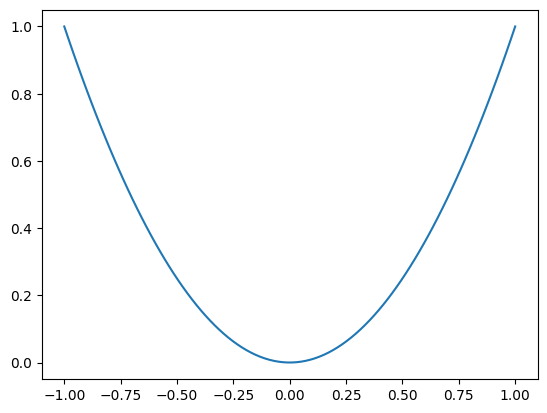

In [550]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x))

**도함수 시각화**

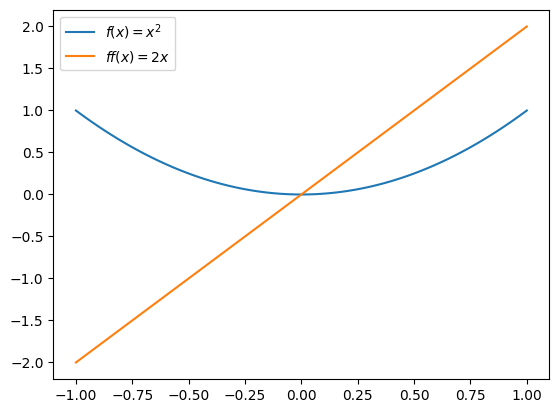

In [551]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x),label=r'$f(x)=x^2$')
plt.plot(x,ff(x),label=r'$ff(x)=2x$')
plt.legend()

(예제3)의 다른표현

In [552]:
def f(x):
    return x**2

In [553]:
def derivate(f):
    h=0.000000000001
    return lambda x: (f(x+h)-f(x))/h

In [554]:
ff = derivate(f)

In [555]:
ff(10)

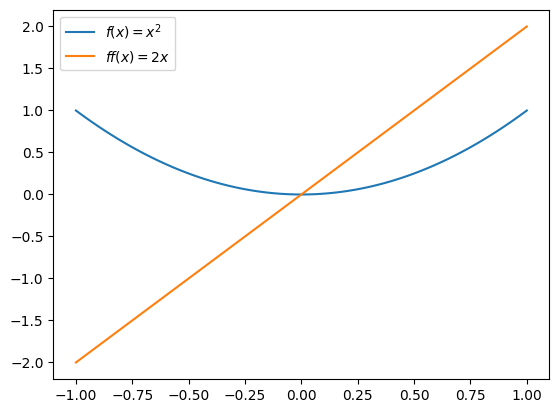

In [556]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x),label=r'$f(x)=x^2$')
plt.plot(x,ff(x),label=r'$ff(x)=2x$')
plt.legend()

(예제4) 함수들의 리스트

In [557]:
flst = [lambda x: x, lambda x: x**2, lambda x: x**3]
flst

In [558]:
for f in flst:
    print(f(2))

2
4
8

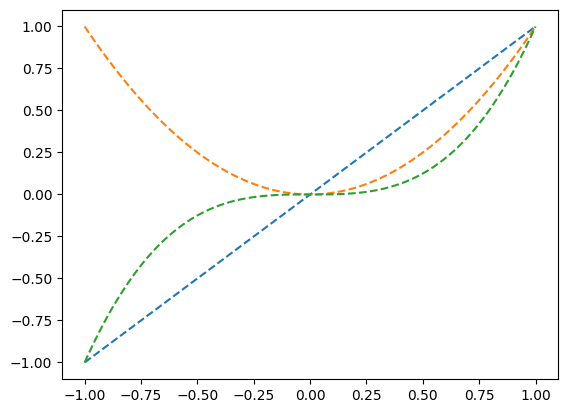

In [559]:
for f in flst:
    plt.plot(x,f(x),'--')

위의코드는 아래와 같음

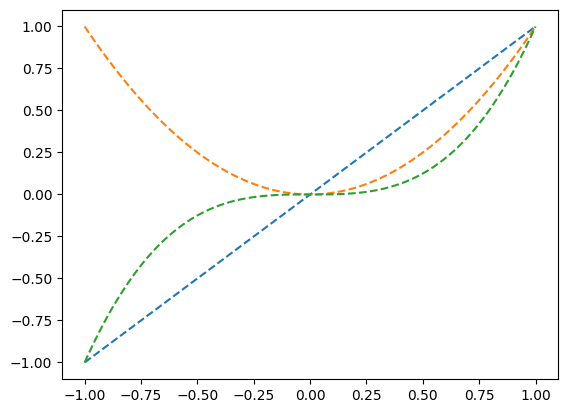

In [560]:
plt.plot(x,(lambda x: x)(x),'--')
plt.plot(x,(lambda x: x**2)(x),'--')
plt.plot(x,(lambda x: x**3)(x),'--')

## C. 정리

`-` 지금까지 개념

-   함수: 변수를 입력으로 받아서 변수를 출력하는 개념
-   변수: 어떠한 값을 저장하는 용도로 쓰거나 함수의 입력 혹은 출력으로
    사용함

`-` R과 구별되는 파이썬의 독특한 테크닉 (부제: 파이썬에서 함수를 잘
쓰려면?)

-   변수든 함수이든 둘다 인스턴스임. (즉 어떠한 클래스에서 찍힌 똑같은
    오브젝트라는 의미)
-   변수를 함수처럼: 메소드 `lst.append(1)`은 마치 `append(lst,1)`와
    같은 함수로 쓸 수 있음
-   함수를 변수처럼($\star$): 함수자체를 함수의 입력으로 혹은 출력으로
    쓸 수도 있음. 함수를 특정 값처럼 생각해서 함수들의 list를 만들 수도
    있다.

## D. callable object

`-` 함수 오브젝트의 비밀?

In [561]:
f = lambda x: x+1

In [562]:
a=11

In [563]:
set(dir(f)) & {'__call__'}

-   함수 오브젝트에는 숨겨진 기능 `__call__`이 있다.

In [564]:
f.__call__(3) # f(3)

In [565]:
f.__call__(4) # f(4)

-   여기에 우리가 정의한 내용이 있다.

`-` 함수처럼 쓸 수 없는 인스턴스는 단지 call이 없는 것일 뿐이다.

In [566]:
class Klass:
    def __init__(self):
        self.name='guebin'

In [567]:
a=Klass()

In [568]:
a()

-   a는 callable이 아니라고 한다.

In [569]:
class Klass2(Klass):
    def __call__(self):
        print(self.name)

In [570]:
b=Klass2()

In [571]:
b()

guebin

-   b는 callable object! 즉 숨겨진 메서드로 `__call__`를 가진 오브젝트!
-   Klass는 callable object를 만들지 못하지만 Klass2는 callable object를
    만든다.

`-` 클래스로 함수를 만들기 (=함수인스턴스를 찍어내는 클래스 설계)

In [572]:
class AddConstant:
    def __init__(self,const):
        self.const = const
    def __call__(self,x):
        return x + self.const

In [573]:
f = AddConstant(3) # callable object생성, f.const에는 3이 저장되어있음.

In [574]:
f(5) # f.const 와 5를 더하는 기능을 수행, # 즉 f(x) = x+3 을 수행함

In [575]:
f(10)

`-` 클래스도 그러고 보니까 `오브젝트` 아니었나?

In [576]:
Student_Ver2?

-   이것도 type 이라는 또 다른 클래스에서 (클래스를 찍는 클래스) 찍힌
    오브젝트이구나..

`-` 클래스 “오브젝트”도 함수 “오브젝트”처럼 `Student_Ver2()`와 같이
사용하면 인스턴스를 만들었음. -\> `Student_Ver2.__call__()` 은
`Student_Ver2()`와 같은 역할을 할 것이다.

***일반적인 구현에서 “클래스 $\to$ 인스턴스” 과정***

In [ ]:
boram = Student_Ver2(age=20.0,semester=0)

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.

In [ ]:
boram + '등록' + '휴학' + '휴학'

***공부를 위해 call을 이용해본 “클래스 $\to$ 인스턴스” 과정***

In [ ]:
boram = Student_Ver2.__call__(age=20.0,semester=0) #
# boram = Student_Ver2(age=20.0,semester=0)

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.

In [ ]:
boram + '등록' + '휴학' + '휴학'

> 파이썬의 비밀11: `f()`와 같이 쓸 수 있는 오브젝트는 단지 `__call__` 이
> 정의되어있는 오브젝트일 뿐이다.

# 5. `__iter__` ($\star\star\star\star\star$)

## A. for문의 복습

`-` 아래와 같은 예제들을 관찰하여 for문을 복습하자.

(예제1) \[1,2,3,4\]

In [ ]:
for i in [1,2,33,4]:
    print(i)

1
2
33
4

(예제2) (1,2,3,4)

In [ ]:
for i in (1,2,33,4):
    print(i)

1
2
33
4

(예제3) ‘1234’

In [ ]:
for i in '123asdf':
    print(i)

1
2
3
a
s
d
f

(예제4) 5

In [ ]:
for i in 5:
    print(i)

`-` 의문1:

``` python
for i in ???:
    print(i)
```

에서 ??? 자리에 올수 있는 것이 무엇일까?

(예제5) \[\[1,2,3,4\],\[3,4,5,6\]\],
pd.DataFrame(\[\[1,2,3,4\],\[3,4,5,6\]\])

In [ ]:
lst = [[1,2,3,4],[3,4,5,6]]
lst

In [ ]:
for l in lst:
    print(l)

[1, 2, 3, 4]
[3, 4, 5, 6]

In [ ]:
for l in np.array(lst):
    print(l)

[1 2 3 4]
[3 4 5 6]

In [ ]:
for l in pd.DataFrame(lst):
    print(l)

0
1
2
3

`-` 데이터프레임인 경우는 colname이 반복

In [ ]:
df = pd.DataFrame({'x':[1,2,3],'y':[2,3,4]})
df

In [ ]:
for d in df:
    print(d)

x
y

`-` 의문2: for의 출력결과는 어떻게 예측할 수 있을까?

## B. for문의 동작원리

`-` 의문1의 해결: 아래의 ??? 자리에 올 수 있는 것은 dir()하여
`__iter__`가 있는 object이다.

``` python
for i in ???:
    print(i)
```

이러한 오브젝트를 iterable object라고 한다.

`-` 예제1~4 확인

In [ ]:
lst = [1,2,3]
set(dir(lst)) & {'__iter__'}

In [ ]:
tpl = 1,2,3
set(dir(tpl)) & {'__iter__'}

In [ ]:
string = '123'
set(dir(string)) & {'__iter__'}

In [ ]:
a = 5
set(dir(a)) & {'__iter__'}

`-` `__iter__`의 역할: iterable object를 iterator로 만들 수 있다!

In [ ]:
lst = [1,22,-33]

In [ ]:
lst_iterator = lst.__iter__()
# lst_iterator = iter(lst)

`-` iterator가 되면 무엇이 좋은가? -\> 숨겨진 기능 `__next__`가 열린다.

In [ ]:
set(dir(lst_iterator)) & {'__next__'}

`-` 그래서 `__next__`의 기능은? -\> 원소를 차례대로 꺼내준다 + 더 이상
꺼낼 원소가 없으면 StopIteration Error를 발생시킨다.

In [ ]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

In [ ]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

In [ ]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

In [ ]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

`-` for문의 동작원리

``` python
for i in iterable:
    ...
```

1.  이터레이터생성: `.__iter__()` 혹은 `iter()`을 이용하여 iterable을
    iterator로 만든다.

2.  $i$생성 및 반복: 1에서 만들어진 iterator에서 `.__next__()`함수를
    호출하고 결과를 $i$에 저장한뒤 for문 블락안의 내용 (들여쓰기 된
    내용) 을 실행한다. $\to$ 반복한다.

3.  정지: `.__next__()`함수를 호출할때 StopIteration Error가 나오면
    for문을 멈춘다.

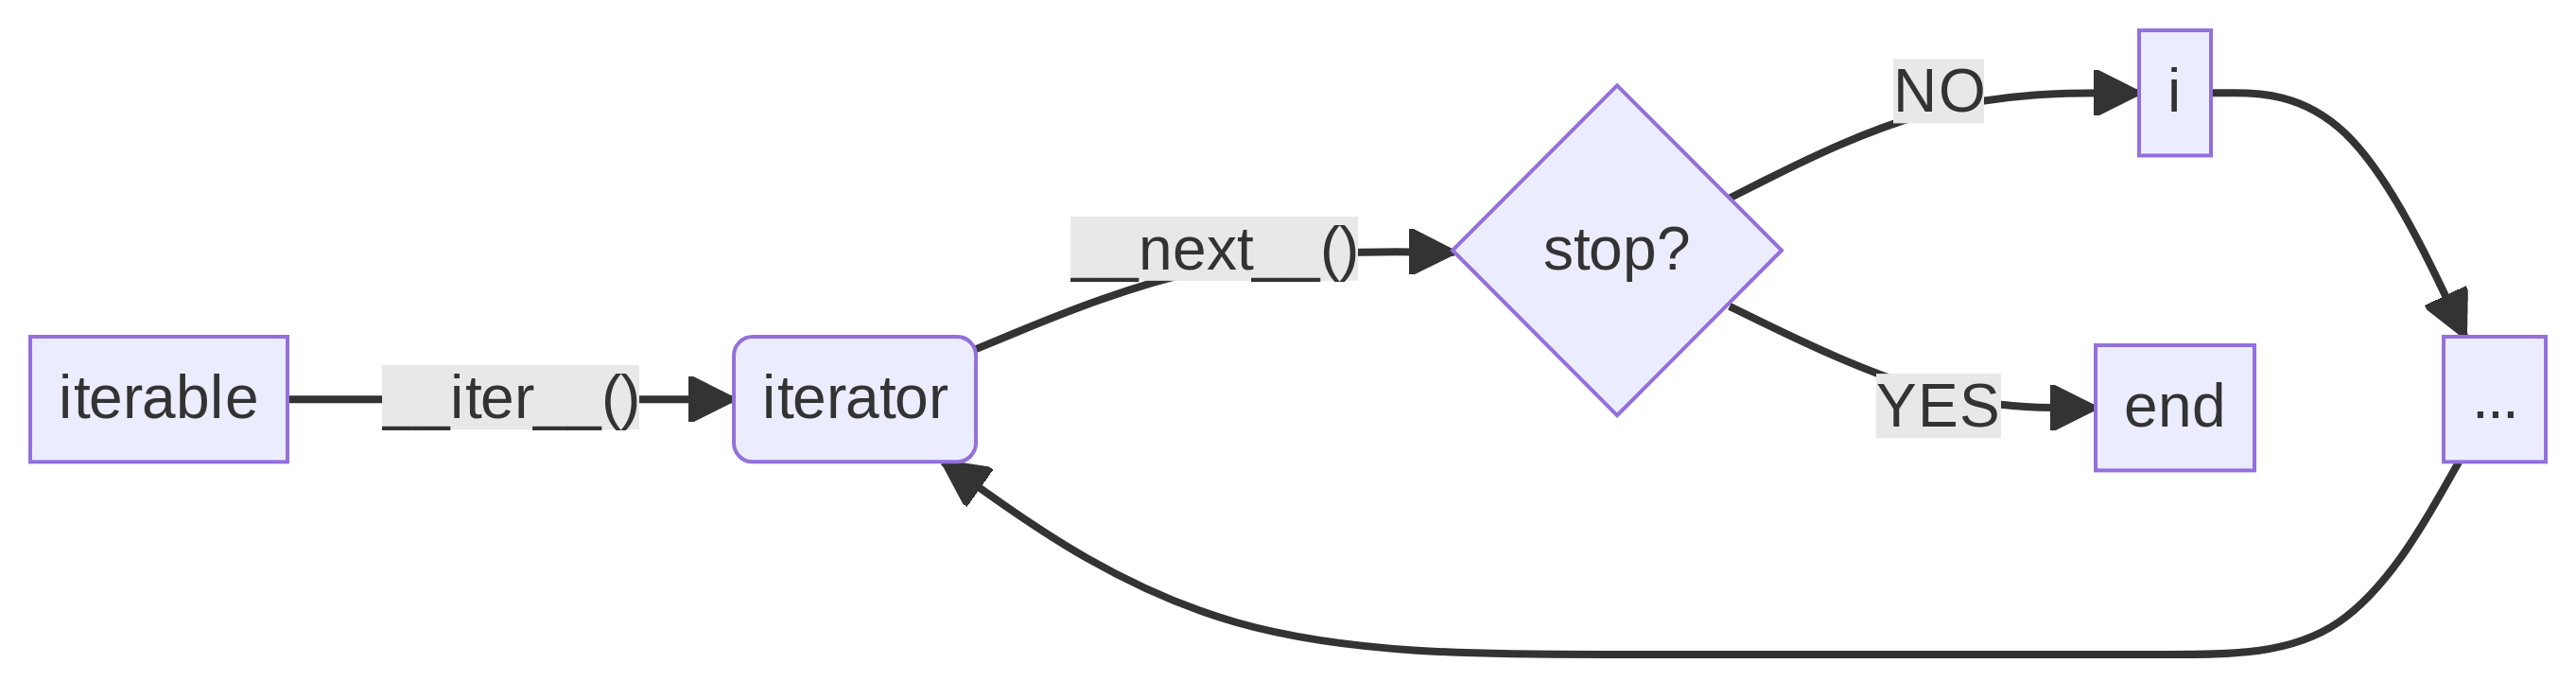

`-` 아래의 구조도 잘 돌아갈까?

``` python
for i in iterator:
    print(i)
```

> iterator의 iter가 자기자신을 리턴하도록 하는 트릭을 쓰면
> “1.이터레이터생성 2.$i$생성 및 반복 3.정지”의 동작원리를 수정하지 않고
> for문을 안전하게 돌릴 수 있다.

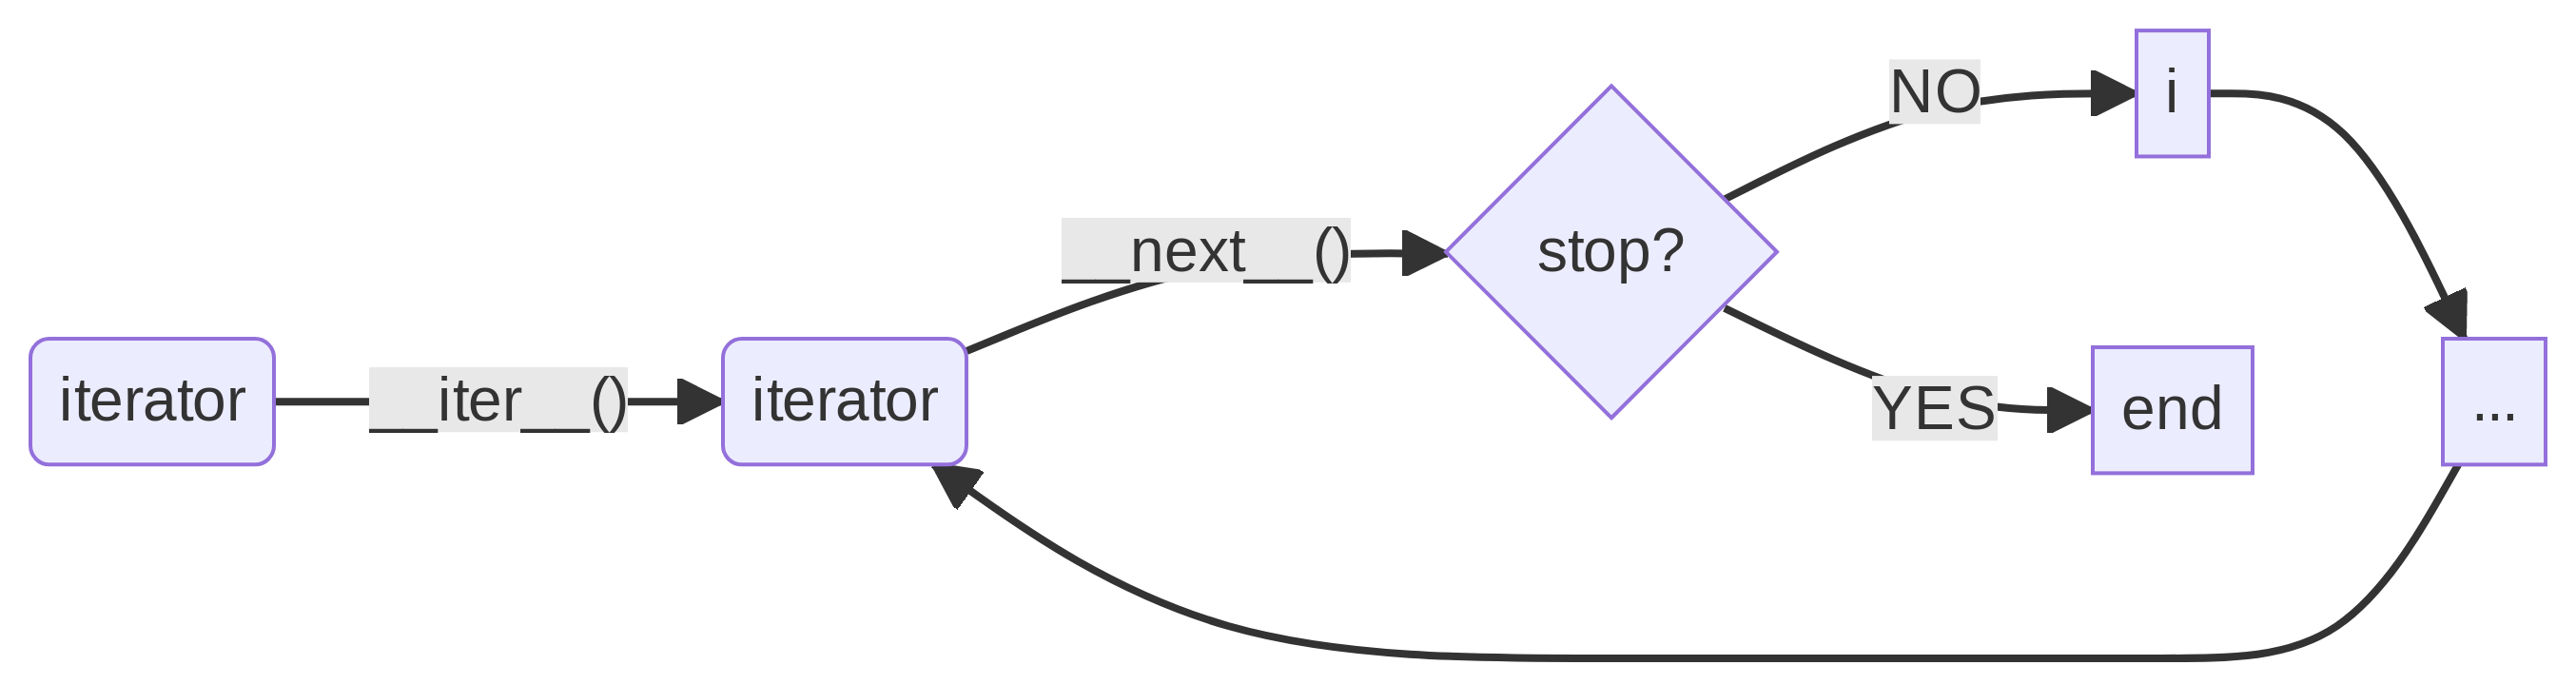

`-` 요약

-   iterable object는 숨겨진 기능으로 `__iter__`를 가진다.
-   iterator는 숨겨진 기능으로 `__iter__`와 `__next__`를 가진다. 따라서
    정의상 iterator는 그 자체로 iterable object가 된다!
-   iterator의 `__iter__`는 자기자신을 리턴한다.

`-` 의문2의 해결: for의 출력결과는 어떻게 예측할 수 있을까? iterator를
만들어서 `.__next__()`의 출력값을 확인하면 알 수 있다.

In [ ]:
_df_itertor = iter(df)

In [ ]:
next(_df_itertor)

In [ ]:
next(_df_itertor)

In [ ]:
next(_df_itertor)

## C. 사용자정의 이터레이터

`-` 내가 이터레이터를 만들어보자.

`-` 찌를 내는 순간 for문이 멈추도록 하는 이터레이터를 만들자.

In [ ]:
class RPS_ITERATOR: # 찌를 내는순간 for문이 멈추도록 하는 이터레이터를 만들자
    def __init__(self):
        self.candidate = ["묵","찌","빠"]
    def __iter__(self):
        return self
    def __next__(self):
        action = np.random.choice(self.candidate)
        if action == "찌":
            print("찌가 나와서 for문을 멈춥니다")
            raise StopIteration
        else:
            return action

In [ ]:
a = RPS_ITERATOR()

In [ ]:
a.__next__()

In [ ]:
a.__next__()

In [ ]:
a.__next__()

In [ ]:
a.__next__()

찌가 나와서 for문을 멈춥니다

In [ ]:
for i in a:
    print(i)

빠
묵
묵
빠
빠
찌가 나와서 for문을 멈춥니다

## D. range()

`-` 파이썬에서 for문을 처음 배울 때: range(5)를 써라!

In [ ]:
for i in range(5):
    print(i)

0
1
2
3
4

-   range(5)가 도데체 무엇이길래?

`-` `range(5)`의 정체는 그냥 iterable object이다.

In [ ]:
set(dir(range(5))) & {'__iter__','__next__'}

`-` 그래서 언제든지 iterator로 바꿀 수 있다.

In [ ]:
rtor= iter(range(5))
rtor

In [ ]:
set(dir(rtor)) &  {'__iter__','__next__'}

`-` for문에서 range(5)가 행동하는 방법?

In [ ]:
rtor = iter(range(5))

In [ ]:
rtor.__next__()

In [ ]:
rtor.__next__()

In [ ]:
rtor.__next__()

In [ ]:
rtor.__next__()

In [ ]:
rtor.__next__()

In [ ]:
rtor.__next__()

## E. zip

`-` 이터레이터의 개념을 알면 for문에 대한 이해도가 대폭 상승한다.

In [ ]:
for i,j in zip([1,2,3],'abc'):
    print(i,j)

1 a
2 b
3 c

-   zip은 뭐지?

In [ ]:
zip([1,2,3],'abc')

`-` 어차피 `for i in ????`: 의 ???? 자리는 iterable object의 자리이다.

In [ ]:
set(dir(zip([1,2,3],'abc'))) & {'__iter__','__next__'}

-   `__next__()`함수가 있음 $\to$ `zip([1,2,3],'abc')`은 그자체로
    iterator 였다!

In [ ]:
z= zip([1,2,3],'abc')

In [ ]:
z.__next__()

In [ ]:
z.__next__()

In [ ]:
z.__next__()

In [ ]:
z.__next__()

***또다른 이해: 그러고보니까 `zip([1,2,3],'abc')`은 뭐하는 문법이지?***

In [ ]:
zip?

-   너 클래스였어?

In [ ]:
iterator_from_zip = zip.__call__([1,2,3],'abc')

In [ ]:
for i,j in iterator_from_zip:
    print(i,j)

1 a
2 b
3 c

> 파이썬의 작은 비밀: zip은 iterator를 찍어내는 클래스이다.

## F. enumerate

`-` zip의 짝궁으로 enumerate가 있음

In [ ]:
for i,s in enumerate('abc'):
    print(i,s)

0 a
1 b
2 c

`-` `enumerate('abc')`도 문법상 iterable object 아니면 iterator 임.

In [ ]:
set(dir(enumerate('abc'))) & {'__iter__', '__next__'}

-   iterator 였군

In [ ]:
iterator = enumerate('abc')

In [ ]:
next(iterator)

In [ ]:
next(iterator)

In [ ]:
next(iterator)

In [ ]:
next(iterator)

`-` 참고: enumerate 는 클래스임

In [ ]:
enumerate?

> 파이썬의 작은 비밀: enumerate 역시 iterator를 찍어내는 클래스다.

> 파이썬의 비밀12: iterator나 iterable object만 for문과 함께 사용할 수
> 있다.